<a href="https://colab.research.google.com/github/KringeKrimson/Pytorch-Basics/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import required libraries

In [1]:
#Import all the required libraries/modules
import torch
import torch.nn as nn
import torch.nn.functional as F # for Forward propagation

#Create the Neural Network Model

In [2]:
#Creating a Model Class that inherits nn.Module
class Model(nn.Module):
  # the basic structure of our NN model
  # Input layer (4 features of the flower) (4,)
  # Hidden Layer1 (number of neurons) (8,)
  # H2 (n) --> (9,)
  # output (3 classes of iris flowers) (3,)
  def __init__(self, in_features=4, h1=8,h2=9, out_features=3): # self, number of features, number of hidden units, output features
    super().__init__()      #OOP concept instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1) #fc1 means fully connected
    self.fc2 = nn.Linear(h1, h2)          #nn.Linear(...) implements the fully connected layer y = x*w + bias
    self.out = nn.Linear(h2, out_features)
  def forward(self, x):
    x = F.relu(self.fc1(x))  #Activation Function
    x = F.relu(self.fc2(x))
    x = self.out(x)          #Output function is not specified here because it can be specified later?
    return x


#Create the Instance


In [3]:
# Picking a maunal seed for randomization
torch.manual_seed(42)
# Create an instance of model
model = Model()

#Importing other libaries


In [4]:
#importing visualizaiton libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Loading Dataset

In [32]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'   # remember to use Raw link
my_data = pd.read_csv(url)
my_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#One Hot Encoding

In [33]:
flowers_name = my_data['variety'].unique()
print(flowers_name)
my_data['variety'] = my_data['variety'].map({'Setosa':0, 'Versicolor':1, 'Virginica':2})
my_data

['Setosa' 'Versicolor' 'Virginica']


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Test Train Slipt!


In [7]:
x = my_data.drop('variety', axis=1).values #.values to convert these into numpy array
y = my_data['variety'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#Set appropriate loss function and optimizer

In [10]:
#set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
#set the optimizer to minimize the error
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [11]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

#Train Model





### Background on Gradients in PyTorch

When training a neural network using backpropagation, gradients are computed to adjust the model's weights. These gradients are used by the optimizer to perform updates to the model parameters. PyTorch accumulates gradients by default, which means that gradients from multiple backward passes are added together (i.e., they are not overwritten). This behaviour is set as default because it makes things easier for RNNs.
### Why optimizer.zero_grad() is Necessary
Gradient Accumulation

Without resetting the gradients, they would accumulate, leading to incorrect updates. For example, if you don't zero the gradients, the optimizer will use the sum of gradients from all previous iterations in each update step, which would distort the learning proces

In [12]:
epochs = 100
losses = []
for i in range(epochs):
  #forward pass
  y_pred = model.forward(x_train) #.forward()  to initiate froward propagation
  #calculate loss
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy()) #.detach() to stop tracking the gradients and convert it to numpy because numpy does not support autograd
  #prints loss every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')
  #backward pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.0846974849700928
Epoch: 10 and loss: 0.9178672432899475
Epoch: 20 and loss: 0.7620365023612976
Epoch: 30 and loss: 0.6275593042373657
Epoch: 40 and loss: 0.46693310141563416
Epoch: 50 and loss: 0.2876907289028168
Epoch: 60 and loss: 0.16747020184993744
Epoch: 70 and loss: 0.10634323954582214
Epoch: 80 and loss: 0.0805111899971962
Epoch: 90 and loss: 0.06965284049510956


#Loss Graph

Text(0.5, 0, 'Epoch')

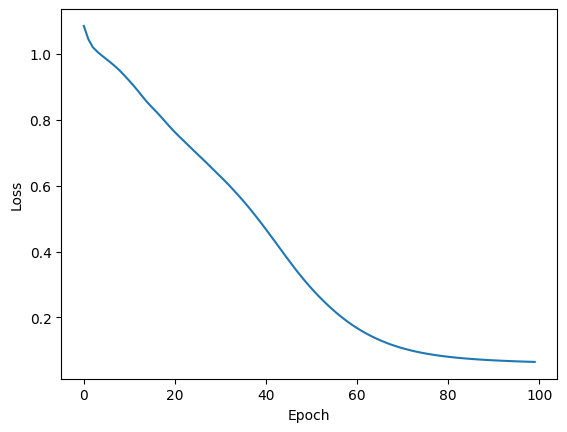

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

#Evaluating the model

In [14]:
with torch.no_grad(): #turns off backpropagation because no need to tune the model its already done!
  y_eval = model.forward(x_test) # prediction
  loss = criterion(y_eval, y_test) # predicted vs actual
print(f'Loss: {loss}')

Loss: 0.06375373154878616


#Accuracy
The accuracy seems to also depend on the initial seeds chosen. For eg: when 41 is chosen it only displays accuracy of 28/30 compared to seed 42 which has 30/30.

In [19]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_val = model.forward(data)
    print(f'Prediction: {y_val.argmax()}, Target: {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print("Total correct:" ,correct, "/", len(x_test))
print(f'Accuracy: {correct/len(x_test)}')

Prediction: 1, Target: 1
Prediction: 0, Target: 0
Prediction: 2, Target: 2
Prediction: 1, Target: 1
Prediction: 1, Target: 1
Prediction: 0, Target: 0
Prediction: 1, Target: 1
Prediction: 2, Target: 2
Prediction: 1, Target: 1
Prediction: 1, Target: 1
Prediction: 2, Target: 2
Prediction: 0, Target: 0
Prediction: 0, Target: 0
Prediction: 0, Target: 0
Prediction: 0, Target: 0
Prediction: 1, Target: 1
Prediction: 2, Target: 2
Prediction: 1, Target: 1
Prediction: 1, Target: 1
Prediction: 2, Target: 2
Prediction: 0, Target: 0
Prediction: 2, Target: 2
Prediction: 0, Target: 0
Prediction: 2, Target: 2
Prediction: 2, Target: 2
Prediction: 2, Target: 2
Prediction: 2, Target: 2
Prediction: 2, Target: 2
Prediction: 0, Target: 0
Prediction: 0, Target: 0
Total correct: 30 / 30
Accuracy: 1.0


#Evaluating on new data

In [34]:
new_data = torch.tensor([[5.1,3.5,1.4,0.2]])
with torch.no_grad():
  print(f'Prediction: {model.forward(new_data)}')
  print(f'Flower: {flowers_name[model.forward(new_data).argmax()]}')

Prediction: tensor([[ 7.7718,  2.2179, -6.9257]])
Flower: Setosa


#Save the Model

In [35]:
torch.save(model.state_dict(), 'Simple_NN_flower_model.pt') #(saves the curres state of parameters i.e. weights, biases and structure of the model,"name of the model")

#Load the Model

In [36]:
new_model = Model()
new_model.load_state_dict(torch.load('Simple_NN_flower_model.pt'))

<All keys matched successfully>

#Check if it loads correctly

In [37]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)